# <ins><div style="text-align: center;"> 3SAT TURING MACHINE </div></ins>
### <div style="text-align: center;">Todor Krasimirov Ivanov</div>

## PROBLEM DEFINITION
3SAT is an NP-complete problem which determines if there is any input that satisfies a boolean function with a specific function structure. This structure is formed by clauses which are joined by the AND boolean function. Each clause is composed by three literals(negated or not) operated with the OR function among them.

Consider $x = x_n..x_2x_1 \in \{0,1\}^n$ where  $x_i \in \{0,1\}$ are the literals and the boolean function $\mathcal f : \{0,1\}^n \rightarrow \{0,1\}$ $\Longrightarrow$ 3SAT looks for $x \mid f(x) = 1$

An example of a 3SAT boolean function would be the following.

$f(x) = (x_1 \lor \bar x_2 \lor x_3) \land (x_2 \lor x_4 \lor \bar x_5) \land (\bar x_1 \lor x_3 \lor x_5)$

## LANGUAGE
In order to build a Turing machine to look for an input $x \in \{0,1\}^n$ that satisfies a given function $\mathcal f : \{0,1\}^n \rightarrow \{0,1\}\}$, the accepting language of the Turing machine is: 

$\mathcal L = \{x | f(x) = 1\}$

## STRUCTURE OF THE TURING MACHINE

To make more efficient the solution to 3SAT with a Turing machine, this solutions uses an extended or customized Turing machine. This translates into more tapes, heads, alphabet symbols...

In this 3SAT Turing machine implementation, there are __two moving or dynamical heads__, one for the __input tape encoding the function (head 0)__ and one for the __combination counter/solution (head 1)__, and $n$ __static heads pointing to the value of each input variable or literal__ $x_i$. This way, the over-transitioning is avoided when one literal's value needs to be checked due to the static heads or when moving to the next combination of $x$ due to the counter head.

Therefore, as there are multiple heads, the Turing machine table definition is slightly different. Specifically, the structure of the table would be the following:

$ T(current\_state,  head,  read) = (write,  move,  next\_state)$

Thus, the Turing machine defined in the _txt_ file has this corresponding structure __CURRENT STATE | HEAD | READ | WRITE | MOVE | NEXT STATE__

The additional column is __HEAD__ and stands for the head index to be read. Note that, as there are two dynamical heads with 0 and 1 indices, the static heads pointing to each input variable will have an index associated starting from the value 2. Then, the input variable $x_i$ has the associated (static) head $i+1$ and the variable $x_n$ is related to the head $n+1$.

It is worth mentioning that __the heads do not read in parallel in this implementation__ but they avoid the transitioning from one side of the tape to another in order to get the next combination to be evaluated. For example, head 0 (input tape head) and head 1 (combination counter head) have a sequential reading just to avoid the constant jumping from one extreme of the tape to the other, and so are the non-moving or static heads as can be seen in the next diagram state representing the Turing machine.

## TURING MACHINE DESIGN

Before explaining the design decisions and considerations of the Turing machine, the corresponding state diagram is shown in the following figure.


![State diagram for 3SAT Turing machine](state_diagram.jpeg)



### State diagram considerations
Although in the _txt_ definition of the Turing machine all transitions are written explicitly, __for the state diagram some assumptions were made for simplicity.__

- $\#$ and $*$ __are the starting and final symbol of the tape__ respectively, reading $x$ means reading __any possible symbol that is not specified in other transitions__ of a state and, when there is no transition in a given state when reading some symbol means that it remains in the same state.


- There are __two types of transitions:__
 - __3-tuple (Head, Read, Move):__ This transition representation is for the head number 0 traversing through the function in the input tape and static heads pointing to each input variable. The _write_ column is omitted because mentioned heads do not modify the read value.
 
 - __4-tuple (Head, Read, Write, Move):__ This representation is exclusively for the head 1 which is the one that adds 1 to the combination of input variables in order to test all existing combinations of the domain.
 
 
 
- The __transitions with ellipses__ mean in practice that there are $n$ intermediate omitted states, __one for each input variable__. These transitions contain as chosen head $H[0]$, this is, the read value from head 0 is the head index (plus one) where the value of that input variable is stored. <ins>E.g.:</ins> If the read value of head 0 is 4, then the intermediate state looks at the value of the variable (head) with index 4+1 = 5. 

### Turing machine workflow

Let's briefly describe the functionality of the state diagram representing the 3SAT Turing machine.

#### 1. States from 0 to 12 represent the acceptance of one clause made of 3 literals operated between them with two ORs.
 - First, __the sign is checked__ in order to see if the input variable that follows is accepted with a 0 (_False_) or a 1(_True_).
 
 
 - Then, __the value of the indexed variable read from the tape is checked__ with its corresponding head in order to see if it has the accepted value.
 
 
 - If __any of the clause literals is accepted, there is no need to check the rest of the clause__ because it will already be accepted (i.e. the clause is already known to be _True_). __Otherwise, the three literals of the clause are checked__ reaching to state 10 or 12 (depending on the sign of the last variable).
 
 
 - If the __clause is _True_, the state 0 is recovered and the next clause is evaluated__ in the same way. In case of __reaching the end of the function tape__ (head 0 reading $*$), that means that the __function is satisfied with the current combination__ from the combination counter. Therefore, the __machine halts and returns the combination from the counter tape__.
 
 
 - If the __clause is _False_, then the function will not be satisfied with that combination so the evaluation is stopped for that combination and the machine will move to the next combination__. This is representated by the transition from states 10 and 12 to state 13.
 
 
#### 2. States from 13 to 16 represent the combination counter of the input variables of the function. Here, the next combination is going to be computed by adding 1 to the string of bits formed by the input variables as all variables start with value 0.
 
 
 - When __the next combination is computed__ with the binary sum of 1, in state 14, __the counter head (head number 1) returns back to the first position__ (i.e. the right-most input variable in the tape). Also, in state 15, __the head of the function (head 0) is brought back to the beginning of the tape__. After this repositioning of the heads, __the initital state 0 is recovered so the next combination evaluation can be performed__.
 
 
 - If __there are no more combinations to test__ and another combination is requested, it means that the __function in the tape has not been satisfied__ with any of the possible combinations of the input variables (i.e. unsatisfiable function). Therefore, all of them are set as __blanks__ in state 16, __meaning there is no solution to the function, and the machine halts.__

## ALPHABET

For the sake of simplification, the considered alphabet or list of symbols has been extended to any integer value $i$ to avoid the need of reading a binary number to determine the literal $x_i$.
This means that, if a boolean function needs more literals in the input $x$ (i.e. increase dimensionality $n$), the new ones would need to be added to the alphabet.

Also, $*$ and $\#$ symbols are included denoting respectively the start and end of the tape.

Then, the alphabet has the following shape:

$\Sigma = \{*, \#, \_, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10...\}$

For the implemented Turing machine, as it can have a maximum of 6 input boolean variables, the specific alphabet is:

$\Sigma = \{*, \#, \_, 0, 1, 2, 3, 4, 5, 6\}$

$f(x) = (x_1 \lor \bar x_2 \lor x_3) \land (x_2 \lor x_4 \lor \bar x_5) \land (\bar x_1 \lor x_3 \lor x_5)$

## STRUCTURE OF THE TAPE

As the 3SAT has a fixed representation of the function (three literals joined with OR operations which form a clause and all clauses are joined by AND operations), it is easy to represent it skipping the OR and AND operations and only represent the literal variable index and its sign (negated or not). This representation results into the following structure of the tape:

$$[\#, literal\_sign, literal\_index, literal\_sign, literal\_index, literal\_sign, literal\_index, ..., *]$$


Now, to easily visualize the tape's format, let's put an example of a function and give the tape encoding for it. Consider $x = x_3x_2x_1 \in \{0,1\}^3$ and the boolean function in 3SAT format:

$f(x) = (x_1 \lor \bar x_2 \lor x_3) \land (x_2 \lor x_4 \lor \bar x_5) \land (\bar x_1 \lor x_3 \lor x_5)$

Then, the tape encoding for $\mathcal f$ is:

__[ # | 1 | 1 | 0 | 2 | 1 | 3 | 1 | 2 | 1 | 4 | 0 | 5 | 0 | 1 | 1 | 3 | 1 | 5 | * ]__

## CONSTRAINTS

- __Sign slots__ can have only two possible values, __0 if the variable that follows in the next slot is negated or 1 if it is not (affirmed)__.


- The designed Turing machine will only work for __at most 6 input variables__. Otherwise, the coded Turing machine in the _txt_ file should be extended in order to work properly with more variables.


- The __3SAT function to be tested__ with the Turing machine must __always obey the 3SAT format of the OR operation among 3 literals which form 1 clause + AND operations among all clauses.__ Otherwise, the Turing machine will behave unexpectedly.


- The __number of input variables $n$ must be provided as a parameter__ together with the tape encoding of the 3SAT function. The reason behind this is to easily initialize the combination counter or solution tape length. <ins>NOTE:</ins> Looking for the maximum number of the input tape which represents the maximum index of the input variables would also give the number of input variables.


$f(x) = (x_1 \lor x_2 \lor x_3) \land (x_1 \lor \bar x_2 \lor x_3) \land (x_1 \lor x_2 \lor \bar x_3) \land (x_1 \lor \bar x_2 \lor \bar x_3) \land (\bar x_1 \lor x_2 \lor x_3) \land (\bar x_1 \lor x_2 \lor \bar x_3) \land (\bar x_1 \lor \bar x_2 \lor x_3)$

## SIMULATION

The next cell contains the code to initialize and run the 3SAT Turing machine given the program (imported from the _txt_ in the testing section), the input tape where the 3SAT function is encoded and the number of input variables _N_ of said function.

It is important to notice that there is a variable called ___solution_tape___ which stands for the aforementioned __counter tape__ where all the input boolean variables are gathered in order to test the function satisfiability with their different combinations. This counter tape is appended to the end of the input tape, however, it can also be an independent tape.

In [1]:
class TuringMachine:    
    def __init__(self, program, input_tape, N, state=0):
        self.trf = {}
        self.state = state
        self.solution_tape = [0] * N
        self.solution_tape = self.solution_tape + ['#']
        self.tape = input_tape + self.solution_tape
        self.heads = [1, len(self.tape)-2]
        for i in range(N):
            self.heads.append(len(self.tape) - 2 - i)
        for line in program.splitlines()[3:]:
            if len(line) == 0 or line[0] == '#':
                continue
            state, head, read, write, move, next_st = line.split(' ')
            self.trf[int(state),int(head),read] = (write, int(move), int(next_st))

    def step(self):
        for i in range(len(self.heads)):
            head_pos = self.heads[i]
            read = self.tape[head_pos]
            action = self.trf.get((self.state, i, str(read)))
            if action:
                write, move, next_st = action
                self.tape[head_pos] = write
                self.heads[i] = self.heads[i] + move
                self.state = next_st

    def run(self, max_iter=999999):
        iter = 0
        #HALT WHEN STATE -1
        while self.state != -1 and iter < max_iter: # prevent infinite loop
            self.step()
            iter += 1
        result = ''.join(self.tape[len(self.tape) - (N + 1):len(self.tape)-1])
        print(f'Turing Machine result satisfying the function: {result}')
        print(f'Finished after {iter} iterations.\n')
        return iter

## TESTS AND EXAMPLES

Let's start with some easy examples to show how to use the 3SAT Turing machine.

__1.__ The aforementioned function of 5 variables: 

$f(x) = (x_1 \lor \bar x_2 \lor x_3) \land (x_2 \lor x_4 \lor \bar x_5) \land (\bar x_1 \lor x_3 \lor x_5)$

In [2]:
# Tape expected output: 00100
def test_5_var_00100():
    print('Running 5-variables 3SAT test function...\nExpected solution = 00100')
    return ['#', 1,1, 1,3, 1,5,  1,1, 0,2, 1,5,  1,4, 0,1, 1,5, '*']

program = open('3-sat-6-var.txt').read()

N = 5
tm = TuringMachine(program, test_5_var_00100(), N)
iterations = tm.run()

Running 5-variables 3SAT test function...
Expected solution = 00100
Turing Machine result satisfying the function: 00100
Finished after 137 iterations.



__2.__ One __3-variables function with a logical contradiction__ in the clauses (i.e. __unsatisfiable function__) which is the 3SAT representation of the following function:

$f(x) = x_1 \land x_2 \land x_3 \land (\bar x_1 \lor \bar x_2 \lor \bar x_3)$

In [3]:
def test_3_var_no_solution():
    print('Running 3-variables 3SAT function...\nExpected solution = ___ (no solution)')
    return ['#', 1,1, 1,2, 1,3, 1,1, 0,2, 1,3, 
            1,1, 1,2, 0,3, 1,1, 0,2, 0,3, 
            0,1, 1,2, 1,3, 0,1, 1,2, 0,3, 
            0,1, 0,2, 1,3, 0,1, 0,2, 0,3,
            '*']

N = 3
tm = TuringMachine(program, test_3_var_no_solution(), N)
iterations = tm.run()

Running 3-variables 3SAT function...
Expected solution = ___ (no solution)
Turing Machine result satisfying the function: ___
Finished after 428 iterations.



__3.__ Another __unsatisfiable function with 5 input variables__ whose regular form (not 3SAT form) is:

$f(x) = x_1 \land x_2 \land x_3 \land x_4 \land x_5 \land (\bar x_3 \lor \bar x_4 \lor \bar x_5)$

In [4]:
def test_5_var_no_solution(): 
    print('Running 5-variables 3SAT test function...\nExpected solution = _____(no solution)')
    return ['#',
            1,1, 1,2, 1,3, 1,1, 0,2, 1,3, 
            1,1, 1,2, 0,3, 1,1, 0,2, 0,3, 
            0,1, 1,2, 1,3, 0,1, 1,2, 0,3, 
            0,1, 0,2, 1,3, 
            1,1, 1,2, 1,4, 1,1, 0,2, 1,4, 
            1,1, 1,2, 0,4, 1,1, 0,2, 0,4, 
            0,1, 1,2, 1,4, 0,1, 1,2, 0,4, 
            0,1, 0,2, 1,4, 
            1,4, 1,2, 1,3, 1,4, 0,2, 1,3, 
            1,4, 1,2, 0,3, 1,4, 0,2, 0,3, 
            0,4, 1,2, 1,3, 0,4, 1,2, 0,3, 
            0,4, 0,2, 1,3, 
            1,1, 1,4, 1,3, 1,1, 0,4, 1,3, 
            1,1, 1,4, 0,3, 1,1, 0,4, 0,3, 
            0,1, 1,4, 1,3, 0,1, 1,4, 0,3, 
            0,1, 0,4, 1,3,
            1,1, 1,2, 1,5, 1,1, 0,2, 1,5, 
            1,1, 1,2, 0,5, 1,1, 0,2, 0,5, 
            0,1, 1,2, 1,5, 0,1, 1,2, 0,5, 
            0,1, 0,2, 1,5, 
            1,1, 1,3, 1,5, 1,1, 0,3, 1,5, 
            1,1, 1,3, 0,5, 1,1, 0,3, 0,5, 
            0,1, 1,3, 1,5, 0,1, 1,3, 0,5, 
            0,1, 0,3, 1,5, 
            1,1, 1,4, 1,5, 1,1, 0,4, 1,5, 
            1,1, 1,4, 0,5, 1,1, 0,4, 0,5, 
            0,1, 1,4, 1,5, 0,1, 1,4, 0,5, 
            0,1, 0,4, 1,5,
            1,2, 1,3, 1,5, 1,2, 0,3, 1,5, 
            1,2, 1,3, 0,5, 1,2, 0,3, 0,5, 
            0,2, 1,3, 1,5, 0,2, 1,3, 0,5, 
            0,2, 0,3, 1,5,  
            1,2, 1,4, 1,5, 1,2, 0,4, 1,5, 
            1,2, 1,4, 0,5, 1,2, 0,4, 0,5, 
            0,2, 1,4, 1,5, 0,2, 1,4, 0,5, 
            0,2, 0,4, 1,5, 
            1,3, 1,4, 1,5, 1,3, 0,4, 1,5, 
            1,3, 1,4, 0,5, 1,3, 0,4, 0,5, 
            0,3, 1,4, 1,5, 0,3, 1,4, 0,5, 
            0,3, 0,4, 1,5, 0,3, 0,4, 0,5,
            '*']

__4.__ Now, in order to see how the number of iterations of the Turing machine scales for a linear increasing of the number of input variables in the worst case scenarios. 

The tests are made for __3, 4, 5 and 6 input variables__, each of them with a __worst-case function which is the copulative conjunction of all variables__:

$f_3(x) = x_1 \land x_2 \land x_3$

$f_4(x) = x_1 \land x_2 \land x_3 \land x_4$

$f_5(x) = x_1 \land x_2 \land x_3 \land x_4 \land x_5$

$f_6(x) = x_1 \land x_2 \land x_3 \land x_4 \land x_5 \land x_6$

Functions like these, with only one valid combination, are the __longest ones when representing them in 3SAT form__. This is noticeable in the tests' definition.

In [5]:
def test_3_var_111():
    print('Running 3-variables 3SAT test function...\nExpected solution = 111')
    return ['#', 1,1, 1,2, 1,3, 1,1, 0,2, 1,3, 
            1,1, 1,2, 0,3, 1,1, 0,2, 0,3, 
            0,1, 1,2, 1,3, 0,1, 1,2, 0,3, 
            0,1, 0,2, 1,3, '*']

def test_4_var_1111(): 
    print('Running 4-variables 3SAT test function...\nExpected solution = 1111')
    return ['#',
            1,1, 1,2, 1,3, 1,1, 0,2, 1,3, 
            1,1, 1,2, 0,3, 1,1, 0,2, 0,3, 
            0,1, 1,2, 1,3, 0,1, 1,2, 0,3, 
            0,1, 0,2, 1,3, 
            1,1, 1,2, 1,4, 1,1, 0,2, 1,4, 
            1,1, 1,2, 0,4, 1,1, 0,2, 0,4, 
            0,1, 1,2, 1,4, 0,1, 1,2, 0,4, 
            0,1, 0,2, 1,4, 
            1,4, 1,2, 1,3, 1,4, 0,2, 1,3, 
            1,4, 1,2, 0,3, 1,4, 0,2, 0,3, 
            0,4, 1,2, 1,3, 0,4, 1,2, 0,3, 
            0,4, 0,2, 1,3, 
            1,1, 1,4, 1,3, 1,1, 0,4, 1,3, 
            1,1, 1,4, 0,3, 1,1, 0,4, 0,3, 
            0,1, 1,4, 1,3, 0,1, 1,4, 0,3, 
            0,1, 0,4, 1,3,
            '*']

def test_5_var_11111():
    print('Running 5-variables 3SAT test function...\nExpected solution = 11111')
    return ['#',
            1,1, 1,2, 1,3, 1,1, 0,2, 1,3, 
            1,1, 1,2, 0,3, 1,1, 0,2, 0,3, 
            0,1, 1,2, 1,3, 0,1, 1,2, 0,3, 
            0,1, 0,2, 1,3, 
            1,1, 1,2, 1,4, 1,1, 0,2, 1,4, 
            1,1, 1,2, 0,4, 1,1, 0,2, 0,4, 
            0,1, 1,2, 1,4, 0,1, 1,2, 0,4, 
            0,1, 0,2, 1,4, 
            1,4, 1,2, 1,3, 1,4, 0,2, 1,3, 
            1,4, 1,2, 0,3, 1,4, 0,2, 0,3, 
            0,4, 1,2, 1,3, 0,4, 1,2, 0,3, 
            0,4, 0,2, 1,3, 
            1,1, 1,4, 1,3, 1,1, 0,4, 1,3, 
            1,1, 1,4, 0,3, 1,1, 0,4, 0,3, 
            0,1, 1,4, 1,3, 0,1, 1,4, 0,3, 
            0,1, 0,4, 1,3,
           
            1,1, 1,2, 1,5, 1,1, 0,2, 1,5, 
            1,1, 1,2, 0,5, 1,1, 0,2, 0,5, 
            0,1, 1,2, 1,5, 0,1, 1,2, 0,5, 
            0,1, 0,2, 1,5, 
            1,1, 1,3, 1,5, 1,1, 0,3, 1,5, 
            1,1, 1,3, 0,5, 1,1, 0,3, 0,5, 
            0,1, 1,3, 1,5, 0,1, 1,3, 0,5, 
            0,1, 0,3, 1,5, 
            1,1, 1,4, 1,5, 1,1, 0,4, 1,5, 
            1,1, 1,4, 0,5, 1,1, 0,4, 0,5, 
            0,1, 1,4, 1,5, 0,1, 1,4, 0,5, 
            0,1, 0,4, 1,5,
            1,2, 1,3, 1,5, 1,2, 0,3, 1,5, 
            1,2, 1,3, 0,5, 1,2, 0,3, 0,5, 
            0,2, 1,3, 1,5, 0,2, 1,3, 0,5, 
            0,2, 0,3, 1,5,  
            1,2, 1,4, 1,5, 1,2, 0,4, 1,5, 
            1,2, 1,4, 0,5, 1,2, 0,4, 0,5, 
            0,2, 1,4, 1,5, 0,2, 1,4, 0,5, 
            0,2, 0,4, 1,5, 
            1,3, 1,4, 1,5, 1,3, 0,4, 1,5, 
            1,3, 1,4, 0,5, 1,3, 0,4, 0,5, 
            0,3, 1,4, 1,5, 0,3, 1,4, 0,5, 
            0,3, 0,4, 1,5,
            '*']

def test_6_var_111111(): 
    print('Running 6-variables 3SAT test function...\nExpected solution = 111111')
    return ['#',
            1,1, 1,2, 1,3, 1,1, 0,2, 1,3, 
            1,1, 1,2, 0,3, 1,1, 0,2, 0,3, 
            0,1, 1,2, 1,3, 0,1, 1,2, 0,3, 
            0,1, 0,2, 1,3, 
            1,1, 1,2, 1,4, 1,1, 0,2, 1,4, 
            1,1, 1,2, 0,4, 1,1, 0,2, 0,4, 
            0,1, 1,2, 1,4, 0,1, 1,2, 0,4, 
            0,1, 0,2, 1,4, 
            1,4, 1,2, 1,3, 1,4, 0,2, 1,3, 
            1,4, 1,2, 0,3, 1,4, 0,2, 0,3, 
            0,4, 1,2, 1,3, 0,4, 1,2, 0,3, 
            0,4, 0,2, 1,3, 
            1,1, 1,4, 1,3, 1,1, 0,4, 1,3, 
            1,1, 1,4, 0,3, 1,1, 0,4, 0,3, 
            0,1, 1,4, 1,3, 0,1, 1,4, 0,3, 
            0,1, 0,4, 1,3,
            1,1, 1,2, 1,5, 1,1, 0,2, 1,5, 
            1,1, 1,2, 0,5, 1,1, 0,2, 0,5, 
            0,1, 1,2, 1,5, 0,1, 1,2, 0,5, 
            0,1, 0,2, 1,5, 
            1,1, 1,3, 1,5, 1,1, 0,3, 1,5, 
            1,1, 1,3, 0,5, 1,1, 0,3, 0,5, 
            0,1, 1,3, 1,5, 0,1, 1,3, 0,5, 
            0,1, 0,3, 1,5, 
            1,1, 1,4, 1,5, 1,1, 0,4, 1,5, 
            1,1, 1,4, 0,5, 1,1, 0,4, 0,5, 
            0,1, 1,4, 1,5, 0,1, 1,4, 0,5, 
            0,1, 0,4, 1,5,
            1,2, 1,3, 1,5, 1,2, 0,3, 1,5, 
            1,2, 1,3, 0,5, 1,2, 0,3, 0,5, 
            0,2, 1,3, 1,5, 0,2, 1,3, 0,5, 
            0,2, 0,3, 1,5,  
            1,2, 1,4, 1,5, 1,2, 0,4, 1,5, 
            1,2, 1,4, 0,5, 1,2, 0,4, 0,5, 
            0,2, 1,4, 1,5, 0,2, 1,4, 0,5, 
            0,2, 0,4, 1,5, 
            1,3, 1,4, 1,5, 1,3, 0,4, 1,5, 
            1,3, 1,4, 0,5, 1,3, 0,4, 0,5, 
            0,3, 1,4, 1,5, 0,3, 1,4, 0,5, 
            0,3, 0,4, 1,5, 
            1,1, 1,2, 1,6, 1,1, 0,2, 1,6, 
            1,1, 1,2, 0,6, 1,1, 0,2, 0,6, 
            0,1, 1,2, 1,6, 0,1, 1,2, 0,6, 
            0,1, 0,2, 1,6, 
            1,1, 1,3, 1,6, 1,1, 0,3, 1,6, 
            1,1, 1,3, 0,6, 1,1, 0,3, 0,6, 
            0,1, 1,3, 1,6, 0,1, 1,3, 0,6, 
            0,1, 0,3, 1,6, 
            1,1, 1,4, 1,6, 1,1, 0,4, 1,6, 
            1,1, 1,4, 0,6, 1,1, 0,4, 0,6, 
            0,1, 1,4, 1,6, 0,1, 1,4, 0,6, 
            0,1, 0,4, 1,6, 
            1,1, 1,5, 1,6, 1,1, 0,5, 1,6, 
            1,1, 1,5, 0,6, 1,1, 0,5, 0,6, 
            0,1, 1,5, 1,6, 0,1, 1,5, 0,6, 
            0,1, 0,5, 1,6, 
            1,3, 1,2, 1,6, 1,3, 0,2, 1,6, 
            1,3, 1,2, 0,6, 1,3, 0,2, 0,6, 
            0,3, 1,2, 1,6, 0,3, 1,2, 0,6, 
            0,3, 0,2, 1,6, 
            1,4, 1,2, 1,6, 1,4, 0,2, 1,6, 
            1,4, 1,2, 0,6, 1,4, 0,2, 0,6, 
            0,4, 1,2, 1,6, 0,4, 1,2, 0,6, 
            0,4, 0,2, 1,6, 
            1,5, 1,2, 1,6, 1,5, 0,2, 1,6, 
            1,5, 1,2, 0,6, 1,5, 0,2, 0,6, 
            0,5, 1,2, 1,6, 0,5, 1,2, 0,6, 
            0,5, 0,2, 1,6, 
            1,3, 1,4, 1,6, 1,3, 0,4, 1,6, 
            1,3, 1,4, 0,6, 1,3, 0,4, 0,6, 
            0,3, 1,4, 1,6, 0,3, 1,4, 0,6, 
            0,3, 0,4, 1,6,
            1,3, 1,5, 1,6, 1,3, 0,5, 1,6, 
            1,3, 1,5, 0,6, 1,3, 0,5, 0,6, 
            0,3, 1,5, 1,6, 0,3, 1,5, 0,6, 
            0,3, 0,5, 1,6,
            1,4, 1,5, 1,6, 1,4, 0,5, 1,6, 
            1,4, 1,5, 0,6, 1,4, 0,5, 0,6, 
            0,4, 1,5, 1,6, 0,4, 1,5, 0,6, 
            0,4, 0,5, 1,6,
            '*']

program = open('3-sat-6-var.txt').read()

it = []
n_vars = []

N = 3
tm = TuringMachine(program, test_3_var_111(), N)
it.append(tm.run())
n_vars.append(N)

N = 4
tm = TuringMachine(program, test_4_var_1111(), N)
it.append(tm.run())
n_vars.append(N)

N = 5
tm = TuringMachine(program, test_5_var_11111(), N)
it.append(tm.run())
n_vars.append(N)

N = 6
tm = TuringMachine(program, test_6_var_111111(), N)
it.append(tm.run())
n_vars.append(N)

Running 3-variables 3SAT test function...
Expected solution = 111
Turing Machine result satisfying the function: 111
Finished after 415 iterations.

Running 4-variables 3SAT test function...
Expected solution = 1111
Turing Machine result satisfying the function: 1111
Finished after 1091 iterations.

Running 5-variables 3SAT test function...
Expected solution = 11111
Turing Machine result satisfying the function: 11111
Finished after 2697 iterations.

Running 6-variables 3SAT test function...
Expected solution = 111111
Turing Machine result satisfying the function: 111111
Finished after 6331 iterations.



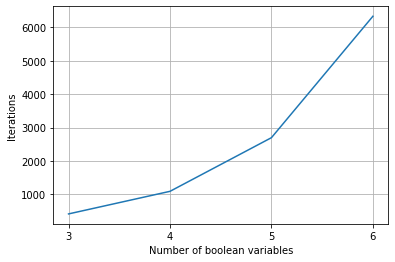

In [6]:
import matplotlib.pyplot as plt

x_ticks = range(n_vars[0], n_vars[-1] + 1)
plt.plot(x_ticks, it)
plt.ylabel("Iterations")
plt.xlabel("Number of boolean variables")
plt.xticks(x_ticks)
plt.grid()
plt.show()

## COMPLEXITY ANALYSIS

### Theoretical analysis

In this section, the complexity of the implemented Turing machine for the 3SAT problem is going to be analyzed.

First, given that the __3SAT is a combinatorial problem__, it is easy to see that the complexity upperbound is checking all combination, therefore $3SAT \in O(2^n)$.

Now, it is necessary to identify the worst case scenario for 3SAT. As it is a problem of state space exploration, the worst case arises when there is only one solution to a given 3SAT formula. A unique-solution boolean function is represented as AND operations between all the boolean variables in order to represent the exact combination which satisfies the function.

In this case, the 3SAT representation does not give any advantage as all OR operations are useless and force to build the largest possible 3SAT function for $n$ input variables.

Analyzing the number of clauses needed for a worst-case 3-variable function, as there are $2^3=8$ possibilities but only 1 solution, $2^3-1=7$ clauses are needed. Given that each clause in 3SAT has 3 literals, for more than 3 input variables, say $n$, there will be 7 clauses for each possible combination of the existing input variables when choosing 3 variables.

Then, the total number of clauses given $n$ variables for a worst-case function is equal to $n\choose3$$\cdot7$.

Also, counting that there are 6 variable/literal elements per clause in the tape, the Turing machine input tape would result into a length equal to $6\cdot$$n\choose3$$\cdot7$.

### Experimental analysis 

Given the vantage point of the theoretical complexity analysis, the tests, seen in their corresponding section, have been developed on purpose in order to demonstrate the exponential complexity of 3SAT in the worst case scenario given an input of $n$ boolean variables.

Gathering the number of iterations of the Turing machine for each of the worst scenarios using $n = {3, 4, 5, 6}$, the exponential tendency can be easily noticed as shown in the previous plot. With $n$ increasing linearly, the number of iterations of the implemented Turing machine for 3SAT increases exponentially in the worst cases.

It is important to say that, given that this problem is characterized as an NP-complete problem, a solution can be found in polynomial time by a non-deterministic Turing machine. In other words, if the satisfying combination was (luckily) the first tested, the problem can be solved in polynomial time because __it would take $O(n^3)^{(1)}$ to check that the combination satisfies the formula, according to the tape's length defined in the worst case theoretical analysis__. This is the reason why each function was engineered so the last possible combination was the one that satisfies the function: the Turing machine starts from all 0s and ends at all 1s which is the solution to the corresponding function.

$^{(1)}$_Complexity based on $n$ variables combination taking 3 (clause's size):_ $n\choose3$$\cdot7 = \frac{n\cdot(n-1)\cdot(n-2)\cdot(n-3)!}{3!(n-3)!}\cdot7=\frac{n\cdot(n-1)\cdot(n-2)}{3!}\cdot7 \in O(n^3)$

## IMPROVEMENTS

The developed Turing machine for 3SAT problem could be generalized to any $n$ input variables without needing to include additional states and transitions. This could be done with a more sophisticated Turing machine description where dynamical head reading is available or with some script adding the needed states for $n$ variables, as adding new variables to this Turing machine table can be achieved with a very simple algorithm.